In [ ]:
import numpy as np
import pandas as pd
#data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
#Encoding Categorical feature
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler # Data preprocessing
from sklearn.impute import SimpleImputer # Data preprocessing
#outliers
#from datasist.structdata import detect_outliers
import joblib
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate,cross_val_score,cross_val_predict,train_test_split,GridSearchCV,RandomizedSearchCV,RepeatedKFold
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, roc_auc_score, make_scorer
#models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xg
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.feature_selection import SequentialFeatureSelector,SelectFromModel,chi2, SelectKBest

In [ ]:
#dataset contains index column
df = pd.read_csv('Expanded_data_with_more_features.csv', index_col=0)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30641 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.5+ MB


In [ ]:
df.describe()

NrSiblings     MathScore  ReadingScore  WritingScore
count  29069.000000  30641.000000  30641.000000  30641.000000
mean       2.145894     66.558402     69.377533     68.418622
std        1.458242     15.361616     14.758952     15.443525
min        0.000000      0.000000     10.000000      4.000000
25%        1.000000     56.000000     59.000000     58.000000
50%        2.000000     67.000000     70.000000     69.000000
75%        3.000000     78.000000     80.000000     79.000000
max        7.000000    100.000000    100.000000    100.000000

***1) Data Cleaning***

In [ ]:
# Null values in each column
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [ ]:
# the percentage of null values for each column
df.isna().sum()/df.shape[0]

Gender                 0.000000
EthnicGroup            0.060050
ParentEduc             0.060213
LunchType              0.000000
TestPrep               0.059724
ParentMaritalStatus    0.038837
PracticeSport          0.020593
IsFirstChild           0.029503
NrSiblings             0.051304
TransportMeans         0.102281
WklyStudyHours         0.031167
MathScore              0.000000
ReadingScore           0.000000
WritingScore           0.000000
dtype: float64

In [ ]:
#check dublicates if it exists
df.duplicated().sum()

0

In [ ]:
# droping Transportmeans as it contains over 11% of its values as nulls
df.drop('TransportMeans',axis=1,inplace=True)
df1 = df.copy()

In [ ]:
#used median to fill nulls in siblings
df['NrSiblings'].fillna(df['NrSiblings'].median(),inplace = True)
df.isna().sum()/df.shape[0]

Gender                 0.000000
EthnicGroup            0.060050
ParentEduc             0.060213
LunchType              0.000000
TestPrep               0.059724
ParentMaritalStatus    0.038837
PracticeSport          0.020593
IsFirstChild           0.029503
NrSiblings             0.000000
WklyStudyHours         0.031167
MathScore              0.000000
ReadingScore           0.000000
WritingScore           0.000000
dtype: float64

In [ ]:
#removing rows with more than 1 null
df = df[df.isnull().sum(axis=1) < 2]
df.isna().sum()/df.shape[0]

Gender                 0.000000
EthnicGroup            0.047363
ParentEduc             0.048613
LunchType              0.000000
TestPrep               0.048342
ParentMaritalStatus    0.030822
PracticeSport          0.015664
IsFirstChild           0.023091
NrSiblings             0.000000
WklyStudyHours         0.024576
MathScore              0.000000
ReadingScore           0.000000
WritingScore           0.000000
dtype: float64

In [ ]:
#fill with mode to categorical data
catego_cols = df.select_dtypes(include=['object']).columns
cat=df[catego_cols]
df=df.drop(catego_cols,axis=1)
cat = cat.apply(lambda x: x.fillna(x.value_counts().index[0]))
df = pd.concat([df, cat], axis=1)

df.isnull().sum()

NrSiblings             0
MathScore              0
ReadingScore           0
WritingScore           0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
WklyStudyHours         0
dtype: int64

In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

NrSiblings: 8 distinct values
MathScore: 95 distinct values
ReadingScore: 90 distinct values
WritingScore: 93 distinct values
Gender: 2 distinct values
EthnicGroup: 5 distinct values
ParentEduc: 6 distinct values
LunchType: 2 distinct values
TestPrep: 2 distinct values
ParentMaritalStatus: 4 distinct values
PracticeSport: 3 distinct values
IsFirstChild: 2 distinct values
WklyStudyHours: 3 distinct values


In [ ]:
df['Gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['EthnicGroup'].unique()

array(['group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [ ]:
df['ParentEduc'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
df['LunchType'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [ ]:
df['TestPrep'].unique()

array(['none', 'completed'], dtype=object)

In [ ]:
df['ParentMaritalStatus'].unique()

array(['married', 'single', 'widowed', 'divorced'], dtype=object)

In [ ]:
df['PracticeSport'].unique()

array(['regularly', 'sometimes', 'never'], dtype=object)

In [ ]:
df['IsFirstChild'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['NrSiblings'].unique()

array([3., 0., 4., 1., 2., 5., 7., 6.])

In [ ]:
df['WklyStudyHours'].unique()

array(['< 5', '5 - 10', '> 10'], dtype=object)

In [ ]:
df['MathScore'].unique()

array([ 71,  69,  87,  45,  76,  73,  85,  41,  65,  37,  58,  40,  66,
        80,  48,  88,  18,  46,  50,  42,  74,  75,  70,  63,  56,  97,
        81,  51,  77,  53,  59,  60,  67,  82,  54,  33,  84,  52,  61,
         0,  39,  62,  64,  47,  44,  28,  49,  57,  27,  68,  79, 100,
        72,  98,  55,  90,  86,  89,  21,  96,  91,  99,  83,  35,  43,
        93,  78,  94,  36,  29,  23,  92,  26,  38,  95,  30,  32,   8,
        34,  31,  25,  22,  17,  20,  16,  19,  24,  15,  11,  12,  13,
         9,  10,   7,  14])

In [ ]:
df['ReadingScore'].unique()

array([ 71,  90,  93,  56,  78,  84,  43,  64,  59,  54,  52,  82,  73,
        53,  75,  89,  32,  42,  69,  76,  70,  72,  65,  87,  81,  91,
        60,  74,  55,  68,  45,  86,  41,  17,  39,  61,  58,  62,  37,
        51,  48,  25,  50,  47,  38,  80,  34,  77,  46,  66,  67,  92,
        44,  88, 100,  63,  99,  83,  94,  57,  79,  49,  36,  85,  40,
        28,  97,  23,  33,  98,  95,  31,  24,  29,  96,  35,  26,  21,
        30,  18,  15,  11,  20,  19,  16,  22,  27,  12,  10,  14])

In [ ]:
df['WritingScore'].unique()

array([ 74,  88,  91,  42,  75,  79,  89,  39,  68,  50,  52,  43,  71,
        58,  78,  86,  28,  47,  63,  70,  51,  80,  76,  53,  65,  72,
        61,  66,  38,  82,  85,  60,  90,  69,  67,  55,  77,  48,  87,
        49,  10,  34,  59,  37,  57,  64,  54,  40,  21,  73,  45,  33,
        83,  36,  94,  62, 100,  99,  95,  56,  41,  27,  81,  98,  46,
        44,  19,  26,  31,  84,  97,  93,  96,  92,  15,  30,  32,  23,
        35,  29,  17,  25,  24,  20,   6,  22,  14,  18,  16,  12,   9,
        13,   4])

***2) Data Analysis***

univariante Analysis

1) histograms for gender, ethnic group, lunch type and parent education

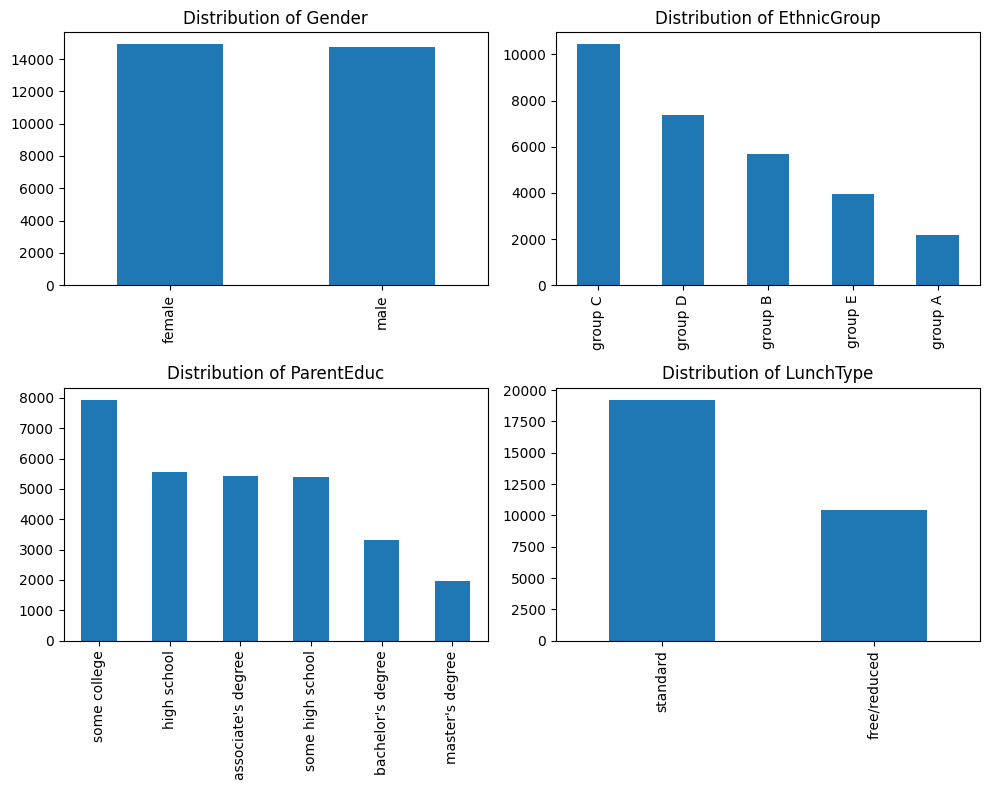

In [ ]:
# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate over the columns and create the distribution plots
columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType']
for i, col in enumerate(columns):
    ax = axs[i//2, i%2]
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribution of {col}")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged graph
plt.show()

In [ ]:
# which Gender have more overall exam score?
#females have better total score accuracy
df['total score'] = df['WritingScore'] + df['ReadingScore'] + df['MathScore']
fig = px.histogram(df, x="Gender", y="total score", histfunc='sum')
fig

In [ ]:
#top 10 students for each class
df_top = df.sort_values(by="total score", ascending=False).groupby("EthnicGroup").head(10)
df_top

NrSiblings  MathScore  ReadingScore  WritingScore  Gender EthnicGroup  \
34          1.0        100           100           100  female     group E   
259         2.0        100           100           100  female     group D   
150         2.0        100           100           100    male     group D   
656         0.0        100           100           100    male     group E   
310         2.0        100           100           100  female     group E   
809         0.0        100           100           100  female     group D   
606         1.0        100           100           100    male     group E   
412         4.0        100           100           100  female     group E   
376         2.0        100           100           100  female     group E   
404         2.0        100           100           100    male     group D   
247         4.0        100           100           100    male     group D   
203         1.0        100           100           100  female     group D   
475         3.0        100           100           100    male     group E   
287         1.0        100           100           100    male     group E   
406         4.0        100           100           100  female     group D   
621         3.0        100           100           100  female     group A   
278         0.0        100           100           100  female     group E   
569         4.0        100           100           100  female     group E   
203         0.0        100           100           100    male     group D   
245         1.0        100           100           100  female     group D   
830         1.0        100           100           100    male     group D   
705         1.0        100           100           100  female     group A   
625         0.0        100           100           100  female     group C   
86          3.0        100           100           100    male     group C   
831         1.0        100           100           100    male     group C   
903         1.0        100           100           100  female     group C   
181         2.0        100           100           100  female     group C   
911         0.0        100           100           100    male     group C   
316         3.0        100           100           100  female     group C   
273         0.0        100           100           100    male     group C   
863         4.0         99           100           100    male     group A   
28          1.0         99           100           100  female     group C   
609         1.0        100            99           100    male     group C   
874         1.0         98           100           100  female     group B   
143         4.0         99            99           100  female     group B   
563         1.0        100           100            98  female     group A   
16          3.0        100           100            98    male     group B   
564         2.0         97           100           100  female     group B   
195         1.0         99           100            98    male     group B   
562         1.0         99           100            97    male     group B   
173         1.0         96           100           100    male     group B   
63          1.0         98            98           100  female     group A   
600         2.0         99            96           100    male     group B   
984         2.0        100           100            95    male     group A   
578         3.0         96            99           100  female     group B   
658         3.0        100            98            97    male     group B   
973         3.0         94           100           100  female     group A   
33          3.0         94           100           100  female     group A   
651         2.0         93           100           100  female     group A   
357         2.0        100            97            96    male     group A   

             ParentEduc   

In [ ]:
# count no of students for for each sibling class and divide the diff Wkly study hours?(histogram)
fig = px.histogram(df, x="NrSiblings", color = 'WklyStudyHours' , marginal="box")
fig

In [ ]:
#calculate no of students for each no of studing hours
#most of the students study between 5 to 10 HRS per week
StdyH =pd.DataFrame(df.groupby('WklyStudyHours')['WklyStudyHours'].count().sort_values(ascending=False))
px.bar(StdyH,x=StdyH.index , y='WklyStudyHours',title="Number of students by studing hours")

In [ ]:
# count no of students for for each sibling class?
#most of the students have either 1 or 2 siblings only
no_sbls =pd.DataFrame(df.groupby('NrSiblings')['NrSiblings'].count().sort_values(ascending=False))
px.scatter(no_sbls,x=no_sbls.index , y='NrSiblings',title="Number of sblings for studing students")

In [ ]:
# count marital statues of parents
#most of the student's parents are married
fig = px.histogram(df, x="ParentMaritalStatus" )
fig

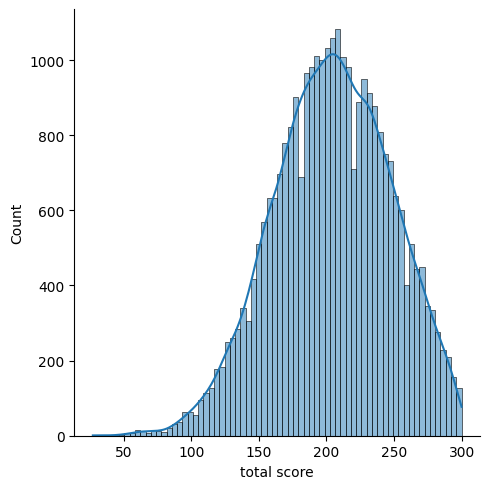

In [ ]:
#dist plot for total score
#dist is almost gaussian
sns.displot(data=df, x="total score", kde=True)

In [ ]:
# count first child
#most of the students are first child
fig = px.histogram(df, x="IsFirstChild" )
fig

In [ ]:
# no of students completed the prep Exam
fig = px.pie(df, names='TestPrep' ,title='prep Exam')
fig.show()

bivariante

In [ ]:
# What is the average Grades of the ones practicing sports and not.
#the ones who practice sports regularly are the ones with highest avg scores and the ones who never practicied sports are the ones with
#least avg
df.groupby('PracticeSport').mean()['total score']

<ipython-input-244-e42814f20d98>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



PracticeSport
never        198.993308
regularly    207.381865
sometimes    203.581677
Name: total score, dtype: float64

<Axes: xlabel='PracticeSport', ylabel='total score'>

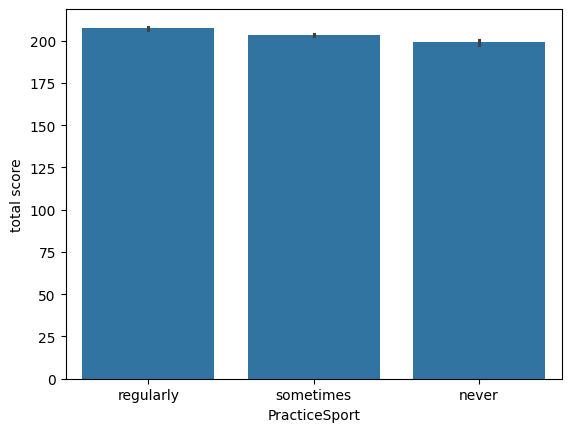

In [ ]:
#ploting the output
sns.barplot(x='PracticeSport', y='total score', data=df, estimator=np.mean)

In [ ]:
#from top students which ones are studing less than 5 hours?
#2 from ethnic group B study less but still gets high Marks
df_top[df_top['WklyStudyHours'].str.contains("< 5")]

NrSiblings  MathScore  ReadingScore  WritingScore  Gender EthnicGroup  \
831         1.0        100           100           100    male     group C   
143         4.0         99            99           100  female     group B   
578         3.0         96            99           100  female     group B   

             ParentEduc LunchType   TestPrep ParentMaritalStatus  \
831     master's degree  standard       none             married   
143     master's degree  standard  completed             married   
578  associate's degree  standard  completed             married   

    PracticeSport IsFirstChild WklyStudyHours  total score  
831     regularly          yes            < 5          300  
143     regularly          yes            < 5          298  
578     regularly           no            < 5          295

In [ ]:
# avg scores for each no. of siblings class?
df_mean = df.groupby('NrSiblings').mean()
df_mean

<ipython-input-247-df0f4d963b34>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



MathScore  ReadingScore  WritingScore  total score
NrSiblings                                                    
0.0         66.791709     69.567914     68.758342   205.117964
1.0         66.462111     69.261001     68.242971   203.966082
2.0         66.494994     69.387962     68.396984   204.279941
3.0         66.697643     69.471044     68.631987   204.800673
4.0         66.258439     69.151547     68.099508   203.509494
5.0         66.742138     69.514151     68.413522   204.669811
6.0         65.858108     68.709459     67.787162   202.354730
7.0         67.434164     69.782918     68.918149   206.135231

<Axes: xlabel='NrSiblings', ylabel='total score'>

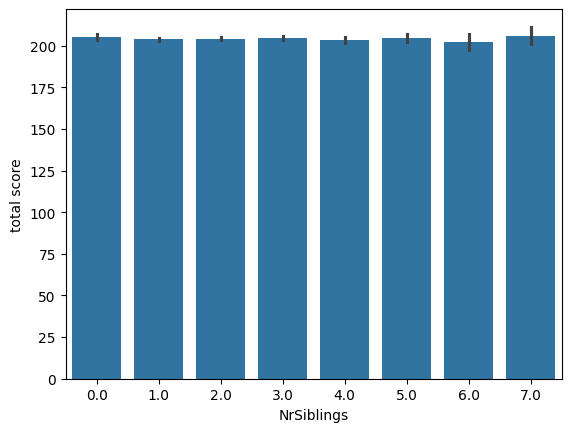

In [ ]:
#plot of avg of total score for each sibling class
sns.barplot(x='NrSiblings', y='total score', data=df, estimator=np.mean)

In [ ]:
#avg of each exam for each sibling class

fig = go.Figure()
x=df['NrSiblings']
fig.add_trace(go.Histogram(x=df['NrSiblings'], y= df['ReadingScore'], histfunc ='avg', name="Avg reading score for each sib number" ))
fig.add_trace(go.Histogram(x=df['NrSiblings'], y= df['WritingScore'], histfunc ='avg',  name="Avg Writing score for each sib number" ))
fig.add_trace(go.Histogram(x=df['NrSiblings'], y= df['MathScore'], histfunc ='avg',  name="Avg Math score for each sib number" ))
fig

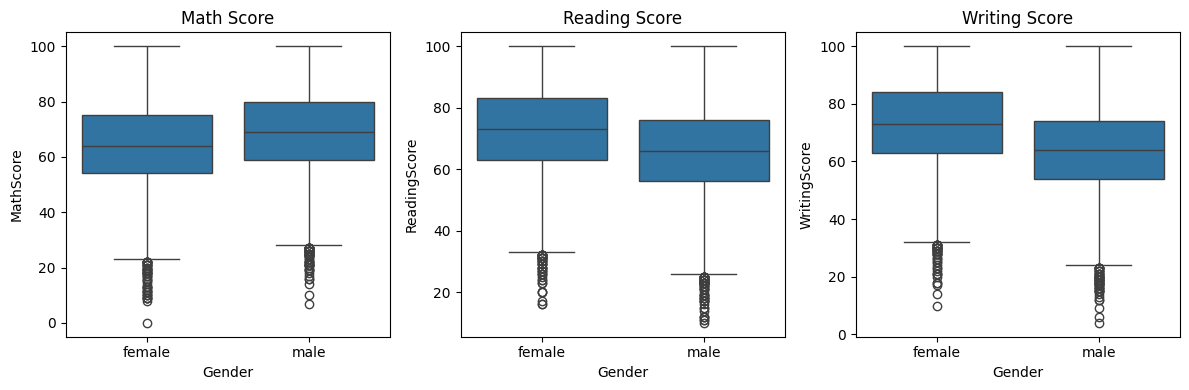

In [ ]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by Gender
sns.boxplot(ax=axs[0], x='Gender', y='MathScore', data=df)
axs[0].set_title('Math Score')

# Box plot of ReadingScore by Gender
sns.boxplot(ax=axs[1], x='Gender', y='ReadingScore', data=df)
axs[1].set_title('Reading Score')

# Box plot of WritingScore by Gender
sns.boxplot(ax=axs[2], x='Gender', y='WritingScore', data=df)
axs[2].set_title('Writing Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

#males are higher in math score but less in reading and writing

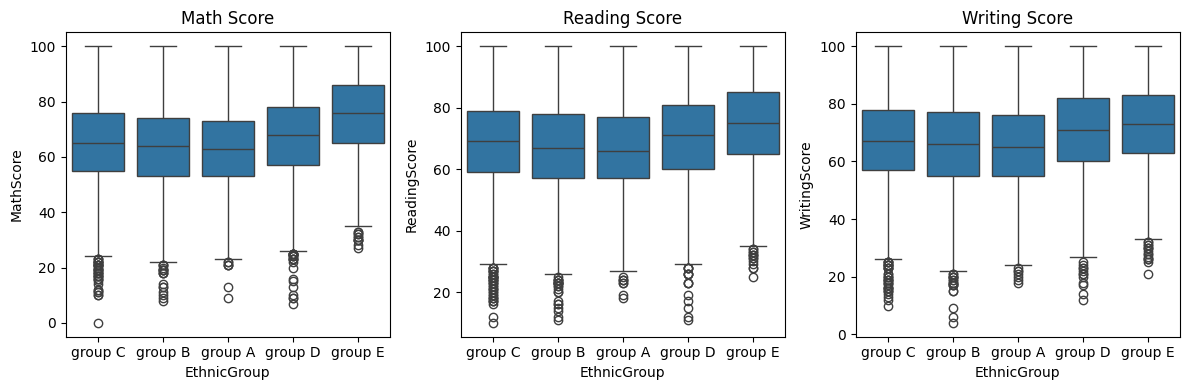

In [ ]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by EthnicGroup
sns.boxplot(ax=axs[0], x='EthnicGroup', y='MathScore', data=df)
axs[0].set_title('Math Score')

# Box plot of ReadingScore by EthnicGroup
sns.boxplot(ax=axs[1], x='EthnicGroup', y='ReadingScore', data=df)
axs[1].set_title('Reading Score')

# Box plot of WritingScore by EthnicGroup
sns.boxplot(ax=axs[2], x='EthnicGroup', y='WritingScore', data=df)
axs[2].set_title('Writing Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

#group E is the best in every test

<ipython-input-252-397de1f25544>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-252-397de1f25544>:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-252-397de1f25544>:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



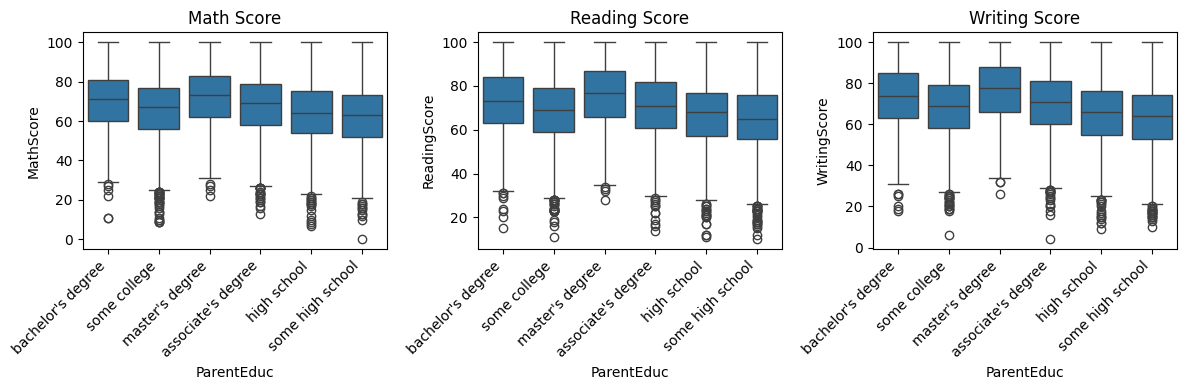

In [ ]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by ParentEduc
sns.boxplot(ax=axs[0], x='ParentEduc', y='MathScore', data=df)
axs[0].set_title('Math Score')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Box plot of ReadingScore by ParentEduc
sns.boxplot(ax=axs[1], x='ParentEduc', y='ReadingScore', data=df)
axs[1].set_title('Reading Score')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# Box plot of WritingScore by ParentEduc
sns.boxplot(ax=axs[2], x='ParentEduc', y='WritingScore', data=df)
axs[2].set_title('Writing Score')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

In [ ]:
#dist plot for all scores
# Group data together
hist_data = [df['ReadingScore'].to_list(), df['WritingScore'].to_list(), df['MathScore'].to_list()]

group_labels = ['Group 1', 'Group 2', 'Group 3']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,  show_hist=False)
fig.show()

In [ ]:
#count of second child for widowed parents
males = df[(df["IsFirstChild"]=='no') & (df['ParentMaritalStatus']=='widowed')]
males.count()['Gender']

189

***3) encoding the categorical***

In [ ]:
#Encoding Categorical feature
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
# Fit and transform the encoder on categorical columns
catego_cols = df.select_dtypes(include=['object']).columns
encoded_cols = encoder.fit_transform(df[catego_cols])

In [ ]:
# Create a DataFrame from the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(catego_cols))

In [ ]:
# Drop the original categorical columns from the original DataFrame
df.drop(catego_cols, axis=1, inplace=True)

In [ ]:
# Concatenate the original DataFrame with the encoded DataFrame
df = df.reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)
df.head(2)

NrSiblings  MathScore  ReadingScore  WritingScore  total score  \
0         3.0         71            71            74          216   
1         0.0         69            90            88          247   

   Gender_male  EthnicGroup_group B  EthnicGroup_group C  EthnicGroup_group D  \
0          0.0                  0.0                  1.0                  0.0   
1          0.0                  0.0                  1.0                  0.0   

   EthnicGroup_group E  ...  LunchType_standard  TestPrep_none  \
0                  0.0  ...                 1.0            1.0   
1                  0.0  ...                 1.0            1.0   

   ParentMaritalStatus_married  ParentMaritalStatus_single  \
0                          1.0                         0.0   
1                          1.0                         0.0   

   ParentMaritalStatus_widowed  PracticeSport_regularly  \
0                          0.0                      1.0   
1                          0.0                      0.0   

   PracticeSport_sometimes  IsFirstChild_yes  WklyStudyHours_< 5  \
0                      0.0               1.0                 1.0   
1                      1.0               1.0                 0.0   

   WklyStudyHours_> 10  
0                  0.0  
1                  0.0  

[2 rows x 25 columns]

In [ ]:
df.drop('total score', axis=1, inplace=True)

In [ ]:
data = df.copy()
data1 = df.copy()

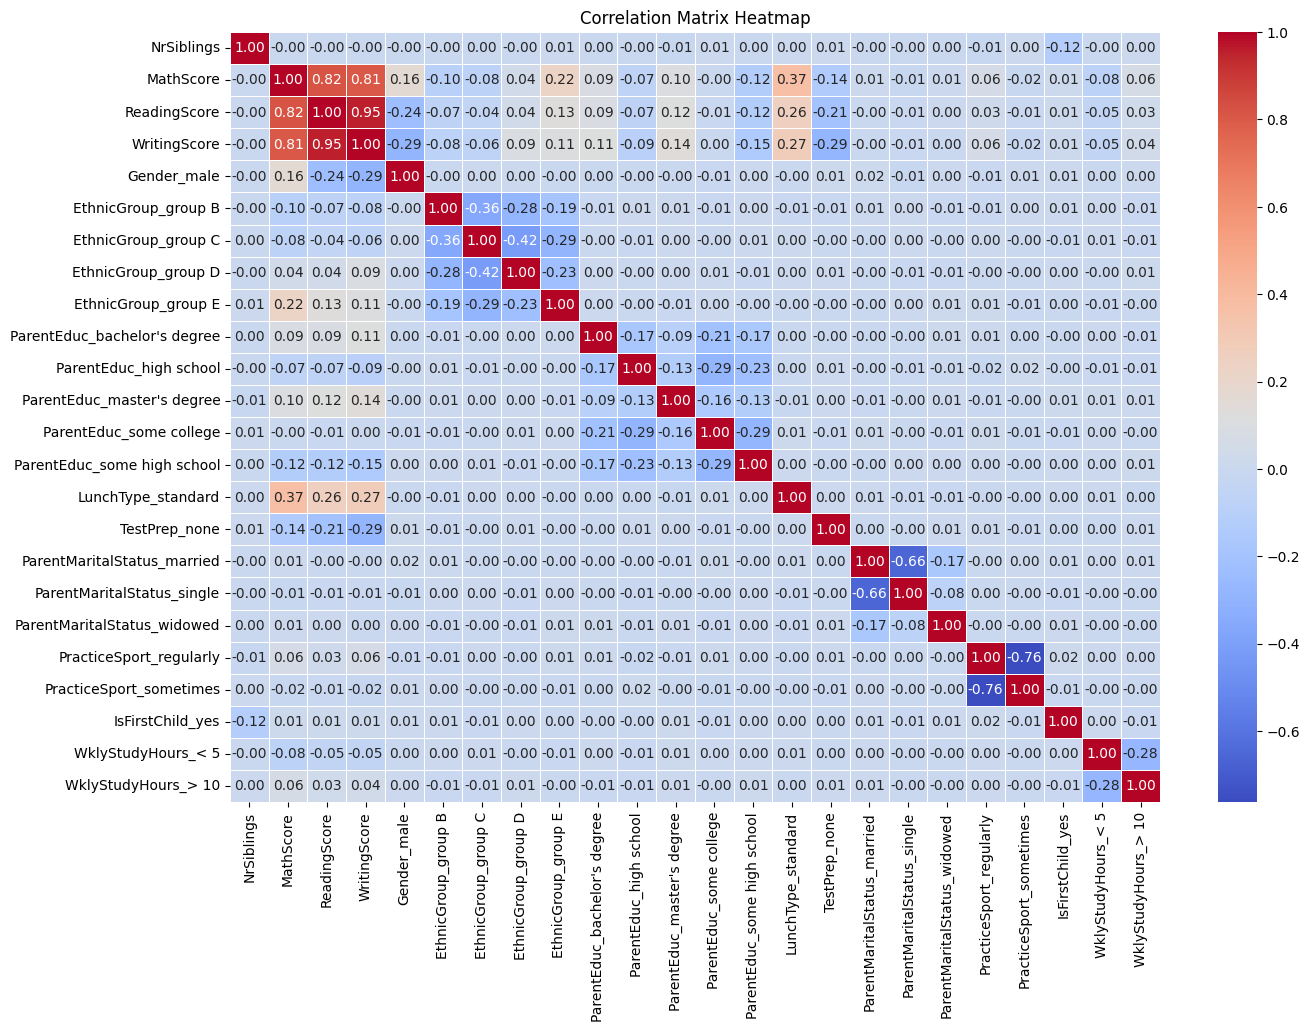

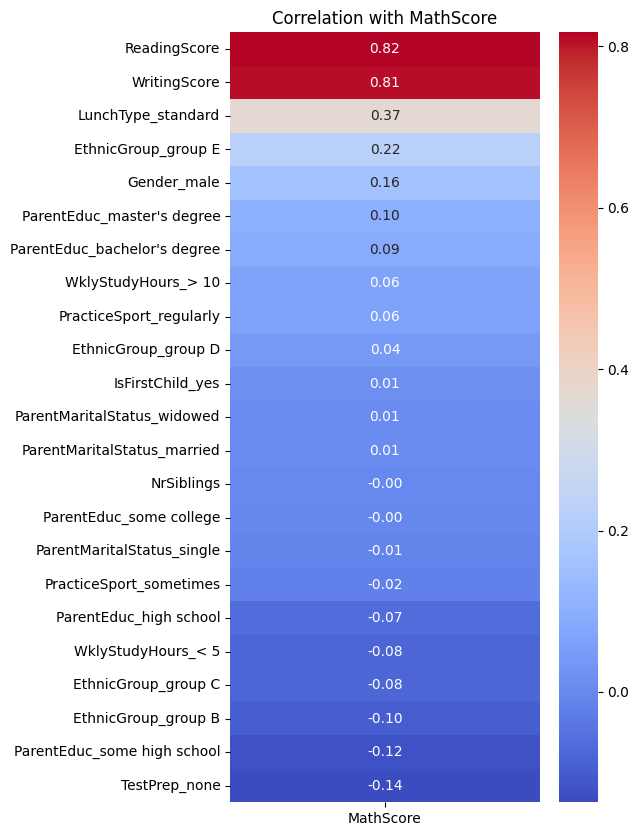

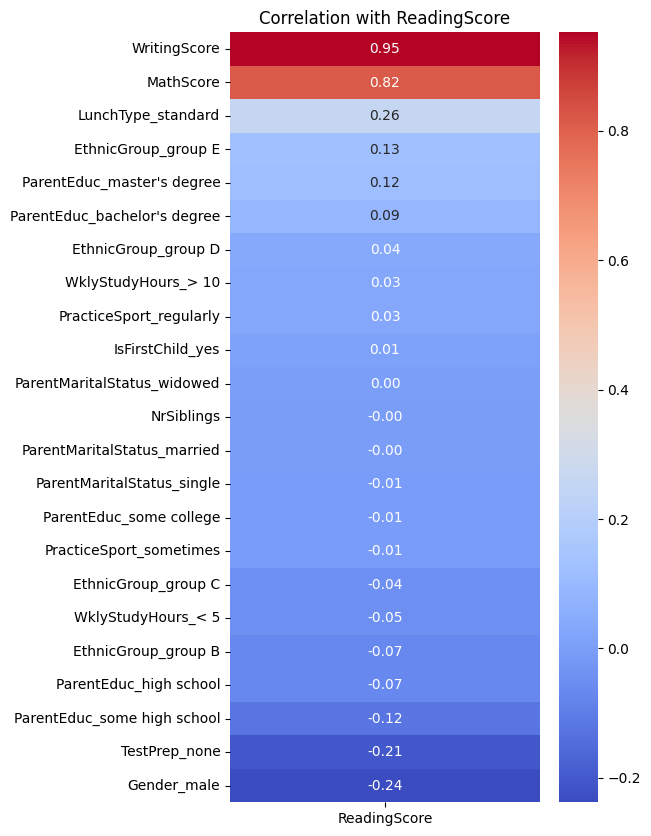

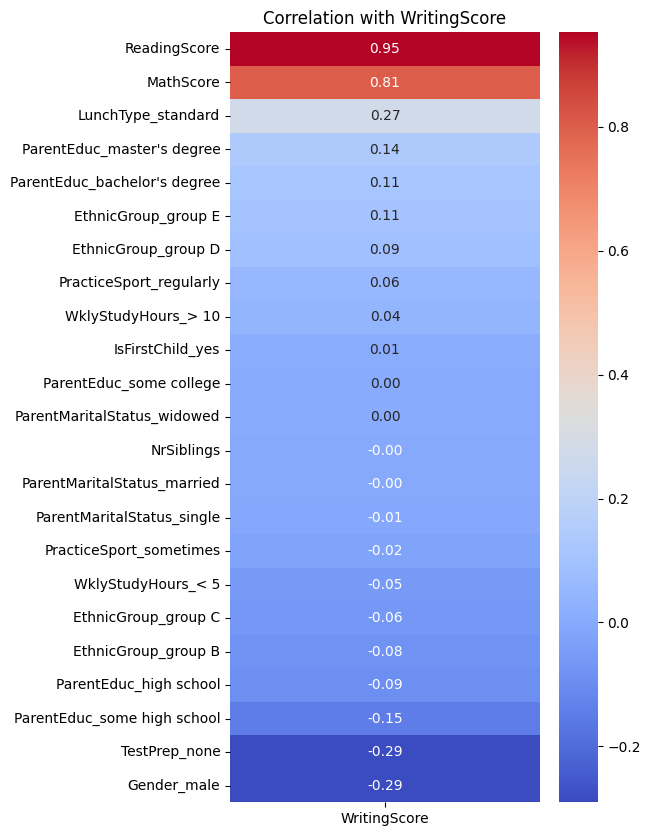

In [ ]:
# Compute the correlation matrix
correlation_matrix = data1.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


# Compute the correlation matrix
correlation_matrix = data.corr()

# Graph II, III, IV: Correlation with MathScore, ReadingScore, WritingScore
for score_column in ['MathScore', 'ReadingScore', 'WritingScore']:
    # Create a heatmap of the correlations with the target column
    corr = data.corr()
    target_corr = corr[score_column].drop(score_column)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    plt.figure(figsize=(5, 10))
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
    plt.title(f'Correlation with {score_column}')
    plt.show()

All three scores (MathScore, ReadingScore, and WritingScore) are highly correlated with each other. This is expected as students who do well in one subject often tend to do well in others. It suggests that common factors like overall study habits, intelligence, or the quality of their education are influencing all three scores.

TestPrep has a positive correlation with all three scores. This suggests that students who took a test preparation course tend to have higher scores. The strongest correlation is with the WritingScore.

The LunchType shows a significant correlation with all three scores

The EthnicGroup has varied correlations with the scores. Group E tends to have a positive correlation, especially with MathScore, indicating that this group tends to have higher scores. On the other hand, Group B and C show a negative correlation with the scores, indicating that these groups tend to have lower scores.

***4) Machine Learning***

Feature selection: from above corrleation graph you will notice that there is features which have no correlation with Target(mathscore)

In [ ]:
df

NrSiblings  MathScore  ReadingScore  WritingScore  Gender_male  \
0             3.0         71            71            74          0.0   
1             0.0         69            90            88          0.0   
2             4.0         87            93            91          0.0   
3             1.0         45            56            42          1.0   
4             0.0         76            78            75          1.0   
...           ...        ...           ...           ...          ...   
29617         2.0         59            61            65          0.0   
29618         1.0         58            53            51          1.0   
29619         1.0         61            70            67          0.0   
29620         3.0         82            90            93          0.0   
29621         1.0         64            60            58          1.0   

       EthnicGroup_group B  EthnicGroup_group C  EthnicGroup_group D  \
0                      0.0                  1.0                  0.0   
1                      0.0                  1.0                  0.0   
2                      1.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  1.0                  0.0   
...                    ...                  ...                  ...   
29617                  0.0                  0.0                  1.0   
29618                  0.0                  0.0                  0.0   
29619                  0.0                  1.0                  0.0   
29620                  0.0                  0.0                  1.0   
29621                  1.0                  0.0                  0.0   

       EthnicGroup_group E  ParentEduc_bachelor's degree  ...  \
0                      0.0                           1.0  ...   
1                      0.0                           0.0  ...   
2                      0.0                           0.0  ...   
3                      0.0                           0.0  ...   
4                      0.0                           0.0  ...   
...                    ...                           ...  ...   
29617                  0.0                           0.0  ...   
29618                  1.0                           0.0  ...   
29619                  0.0                           0.0  ...   
29620                  0.0                           0.0  ...   
29621                  0.0                           0.0  ...   

       LunchType_standard  TestPrep_none  ParentMaritalStatus_married  \
0                     1.0            1.0                          1.0   
1                     1.0            1.0                          1.0   
2                     1.0            1.0                          0.0   
3                     0.0            1.0                          1.0   
4                     1.0            1.0                          1.0   
...                   ...            ...                          ...   
29617                 1.0            1.0                          0.0   
29618                 1.0            1.0                          0.0   
29619                 0.0            0.0                          1.0   
29620                 1.0            0.0                          1.0   
29621                 1.0            1.0                          1.0   

       ParentMaritalStatus_single  ParentMaritalStatus_widowed  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             1.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   
...                           ...                          ...   
29617                         1.0                          0.0   
29618                         1.0                          0.0   
29619        

Feature Selection

In [ ]:
columns = ['NrSiblings','IsFirstChild_yes','ParentMaritalStatus_widowed','ParentMaritalStatus_married', 'ParentMaritalStatus_single']
df.drop(columns, axis=1, inplace=True)
#Columnx that have 0 corr with target

In [ ]:
df

MathScore  ReadingScore  WritingScore  Gender_male  \
0             71            71            74          0.0   
1             69            90            88          0.0   
2             87            93            91          0.0   
3             45            56            42          1.0   
4             76            78            75          1.0   
...          ...           ...           ...          ...   
29617         59            61            65          0.0   
29618         58            53            51          1.0   
29619         61            70            67          0.0   
29620         82            90            93          0.0   
29621         64            60            58          1.0   

       EthnicGroup_group B  EthnicGroup_group C  EthnicGroup_group D  \
0                      0.0                  1.0                  0.0   
1                      0.0                  1.0                  0.0   
2                      1.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  1.0                  0.0   
...                    ...                  ...                  ...   
29617                  0.0                  0.0                  1.0   
29618                  0.0                  0.0                  0.0   
29619                  0.0                  1.0                  0.0   
29620                  0.0                  0.0                  1.0   
29621                  1.0                  0.0                  0.0   

       EthnicGroup_group E  ParentEduc_bachelor's degree  \
0                      0.0                           1.0   
1                      0.0                           0.0   
2                      0.0                           0.0   
3                      0.0                           0.0   
4                      0.0                           0.0   
...                    ...                           ...   
29617                  0.0                           0.0   
29618                  1.0                           0.0   
29619                  0.0                           0.0   
29620                  0.0                           0.0   
29621                  0.0                           0.0   

       ParentEduc_high school  ParentEduc_master's degree  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         1.0   
3                         0.0                         0.0   
4                         0.0                         0.0   
...                       ...                         ...   
29617                     1.0                         0.0   
29618                     1.0                         0.0   
29619                     1.0                         0.0   
29620                     0.0                         0.0   
29621                     0.0                         0.0   

       ParentEduc_some college  ParentEduc_some high school  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          1.0                          0.0   
...                        ...                          ...   
29617                      0.0                          0.0   
29618                      0.0                          0.0   
29619                      0.0                          0.0   
29620                      0.0                          0.0   
29621                      1.0                          0.0   

       LunchType_standard  TestPrep_none  PracticeSport_regularly  \
0                     1.0            1.0                      1.0   
1                     1.0            1.0                    

In [ ]:
x=df.drop('MathScore',axis=1)
y=df['MathScore']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
#Initial training
models = {
    'LR': LinearRegression(),
    'SVR' : SVR(),
    'RF' : RandomForestRegressor(),
    'DT': DecisionTreeRegressor()
}

In [ ]:
for name, model in models.items():
    print(f'using model: {name}')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_2 = model.predict(x_train)
    print(f'MSE score: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'r2 score: {r2_score(y_test,y_pred)}')
    print(f'r2 score: {r2_score(y_train,y_pred_2)}')
#both SVR and linear regression shows no overfitting but i will choose SVR to be able to tune it

using model: LR
MSE score: 5.434110554444141
r2 score: 0.8745871798812145
r2 score: 0.8740029659614686
using model: SVR
MSE score: 5.5484476894372605
r2 score: 0.8692541279189371
r2 score: 0.8723992332241386
using model: RF
MSE score: 5.887614922148201
r2 score: 0.8527810251878296
r2 score: 0.9773243777330441
using model: DT
MSE score: 8.059987020100088
r2 score: 0.7240987429198615
r2 score: 0.9970306628675026


Hyper paramter Tunning

In [ ]:
SVR_model = SVR()


In [ ]:
# Set the parameters for cross-validation
parameters = {'C': np.logspace(-3, 2, 6),
              'epsilon': np.logspace(-3, 2, 6),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [ ]:
# Perform Randomized Search CV
random_search = RandomizedSearchCV(SVR(), parameters, cv=3, n_jobs=-1, verbose=2)
random_search.fit(x_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'epsilon': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=2)

In [ ]:
# Get the best estimator
best_model = random_search.best_estimator_
# Predict the scores
y_pred = best_model.predict(x_test)
# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2

0.8744584886900738

In [ ]:
#evaluation for train data(shows enhancment)& no overfitting
y_pred_2 = best_model.predict(x_train)
r2 = r2_score(y_train, y_pred_2)
r2

0.8739538093988787

In [ ]:
pl=make_pipeline(StandardScaler(),SVR())

In [281]:
joblib.dump(best_model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')
joblib.dump(x.columns, 'features.h5')

['features.h5']